In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
import os
import re
import json
import seaborn as sns

In [2]:
# data folder path
data_directory = os.path.join('..', '..','data','yelp_datasets')
data_directory_saves = os.path.join('..', '..','data','clean_data')

# data file location
health_business = os.path.join(data_directory_saves,'final_health_business.csv')
review_dataset = os.path.join(data_directory,'yelp_academic_dataset_review.json')

## Load health business

In [3]:
df_business = pd.read_csv(health_business)
df_business.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 10 columns):
attributes         3416 non-null object
business_id        3712 non-null object
categories         3712 non-null object
city               3712 non-null object
name               3712 non-null object
review_count       3712 non-null int64
star_avg           3712 non-null float64
state              3712 non-null object
categories_list    3712 non-null object
health_business    3712 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 290.1+ KB


In [5]:
df_business.head()

,attributes,business_id,categories,city,name,review_count,star_avg,state,categories_list,health_business
0,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care
1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",EXS2vZ60ad1LGfJKBdwiWg,"doctors, health & medical, urgent care, medica...",Scottsdale,FastMed Urgent Care,122,2.5,AZ,"['doctors', ' health & medical', ' urgent care...",urgent care
2,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",JdzoXkjb4uHLTEkiaSZRuQ,"doctors, urgent care, health & medical",Goodyear,Banner Urgent Care,27,3.0,AZ,"['doctors', ' urgent care', ' health & medical']",urgent care
3,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",3_dwAO5gWSX0zNtJ7xAB9w,"hospitals, health & medical, urgent care, doctors",Anthem,HonorHealth Immediate Care - Gavilan Peak,20,2.0,AZ,"['hospitals', ' health & medical', ' urgent ca...",urgent care
4,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",SPnKdy0k9npg8qonOQpaSw,"urgent care, health & medical",Indian Land,Doctors Care - Indian Land,4,1.0,SC,"['urgent care', ' health & medical']",urgent care


## load review dataset

In [6]:
%%time
with open(review_dataset, encoding="utf-8") as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)

CPU times: user 1min 53s, sys: 1min 26s, total: 3min 20s
Wall time: 3min 18s


In [7]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [8]:
df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [9]:
#sns.heatmap(df_review.isnull().T, cbar=False)

## Merge both datasets

In [10]:
%%time
health = pd.merge(df_business,df_review, on='business_id')

CPU times: user 9.03 s, sys: 3.22 s, total: 12.2 s
Wall time: 10.3 s


In [11]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60886 entries, 0 to 60885
Data columns (total 18 columns):
attributes         59643 non-null object
business_id        60886 non-null object
categories         60886 non-null object
city               60886 non-null object
name               60886 non-null object
review_count       60886 non-null int64
star_avg           60886 non-null float64
state              60886 non-null object
categories_list    60886 non-null object
health_business    60886 non-null object
cool               60886 non-null int64
date               60886 non-null object
funny              60886 non-null int64
review_id          60886 non-null object
stars              60886 non-null int64
text               60886 non-null object
useful             60886 non-null int64
user_id            60886 non-null object
dtypes: float64(1), int64(5), object(12)
memory usage: 8.8+ MB


In [12]:
health.head()

,attributes,business_id,categories,city,name,review_count,star_avg,state,categories_list,health_business,cool,date,funny,review_id,stars,text,useful,user_id
0,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care,0,2014-04-14,1,4ar9LmGU4rQ3vXFj325HCg,1,If your aim is to waste hours upon hours of yo...,4,Q65wQUGgOh40s-BOnMb1Yg
1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care,0,2015-07-23,1,mZo59NzNBPr9RegkzjIGVA,5,"Memorial Day Weekend.. I can't Thank Dr, Shuc...",0,a7zhH555rbvQO9e-to4pvA
2,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care,0,2017-06-18,0,5wf0Y31knIyBcbS7ZKrW9Q,5,This is not my primary doctor and I was pleasa...,0,HsUSAQjOqvLyG-MoziLrVw
3,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care,0,2017-12-27,0,pNVZVifb7FHtr7xMAbLZ4Q,5,Went there the first time for myself and was n...,0,euNbjUhzS7_jK-rMibmEVw
4,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...",2hpi6pXIFf0taDIYCoNIuw,"health & medical, urgent care",Las Vegas,Healthcare Partner,80,2.5,NV,"['health & medical', ' urgent care']",urgent care,0,2014-09-27,0,OfFzPtU9N0ooeQbIg6yR-g,1,Terrible assistance. I was there to see a rash...,0,8DD5pZeu_i79ognXNO8UIQ


## display null values

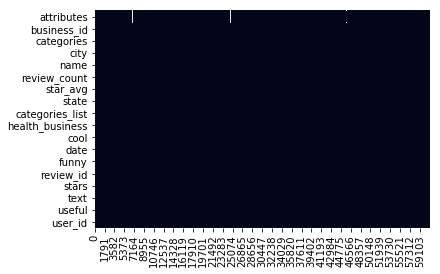

In [13]:
sns.heatmap(health.isnull().T, cbar=False)

# save

In [14]:
health.to_csv(data_directory_saves+'/health_business_review_full.csv')